# Project 1: Explore Weather Trends

## Outline
##### Step 1: Use SQL to extract temperature data for NYC and world from the database <br>
```SQL
select cd.year, cd.avg_temp as nyc_temp, gd.avg_temp as global_temp
from city_data cd
join global_data gd on cd.year = gd.year
where cd.city = 'New York' and cd.country = 'United States' 
```

##### Step 2: Use Python for data wrangling <br>

In [1]:
# load packages and data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
temp_df = pd.read_csv('../Downloads/results.csv')
temp_df.head()

,year,nyc_temp,global_temp
0,1750,10.07,8.72
1,1751,10.79,7.98
2,1752,2.81,5.78
3,1753,9.52,8.39
4,1754,9.88,8.47


In [2]:
# checking missing data
temp_df.loc[temp_df.isnull().any(axis = 1),:]

,year,nyc_temp,global_temp
30,1780,NaN,9.43


##### Step 3: Calculate 10-year simple moving average to smooth out the lines 

In [4]:
# calculate 10-year moving average
temp_df['nyc_temp_sma'] = temp_df.loc[:,'nyc_temp'].rolling(window = 10).mean()
temp_df['global_temp_sma'] = temp_df.loc[:,'global_temp'].rolling(window = 10).mean()

##### Step 4: Plot the data and make observations

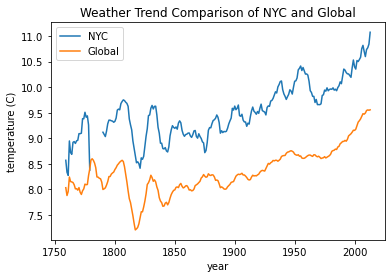

In [10]:
# plot out
%matplotlib inline
temp_df.plot(x = 'year', y= ['nyc_temp_sma', 'global_temp_sma'], label = ['NYC','Global']);
plt.ylabel('temperature (C)');
plt.title('Weather Trend Comparison of NYC and Global');

In [11]:
# calculate the raw correlation from the time series
print(temp_df.nyc_temp.corr(temp_df.global_temp))

0.5634132512382904


In [27]:
# difference between NYC and global average
temp_df['diff'] = temp_df.nyc_temp - temp_df.global_temp
print('The mean of difference is', temp_df['diff'].mean(),
      '\nThe variance of difference is',temp_df['diff'].var())

The mean of difference is 1.1315589353612165 
The variance of difference is 0.8270246596813051


## Observations
* NYC is consistently hotter than the global average
* The temperature change in NYC is following the temperature change in global average closely, the two time series have a correlation of 0.56
* The temperature differences between NYC and global average look stable during this historical time period
* The overall temperature trend for global average is increasing -- meaning the world is getting hotter over time. The trend is not consistent over the last few hundred years, as we can see there is a huge dip at the beginning of 19th century
